# Importiere Daten


In [119]:

# import os,sys
import numpy as np
import pandas as pd
import geopandas as gp
import xarray as xr
import datetime
from matplotlib import pyplot as plt
# import subprocess


In [121]:
# File paths
TMin_file = 'data/cru_ts4.07.1901.2022.tmn.dat.nc/cru_ts4.07.1901.2022.tmn.dat.nc'
TMax_file = 'data/cru_ts4.07.1901.2022.tmx.dat.nc/cru_ts4.07.1901.2022.tmx.dat.nc'

# Load datasets
TMin = xr.open_dataset(TMin_file)
TMax = xr.open_dataset(TMax_file)



### Differenz berechnen

In [122]:
temperature_difference = TMax.tmx - TMin.tmn   # Normale Differenz fü jeden Punkt

In [129]:
#Projeziert auf eine latitude
TMin_Lat = TMin.mean('lon')
TMax_Lat = TMax.mean('lon')

In [130]:
TMax_Lat

<xarray.Dataset>
Dimensions:  (lat: 360, time: 1464)
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2022-12-16
Data variables:
    tmx      (time, lat) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    stn      (time, lat) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [132]:
np.count_nonzero(~np.isnan(TMax_Lat.tmx.isel(time = 0)))
# temperature_difference.isel(time =0,lat = 330, lon = 265)

280

In [124]:

start = 3
end = 1400

# Erstelle ein NumPy-Array von 3 bis 1400 (inklusive) mit Schritten von 12
array = range(3, 1200, 12)

print(array)

range(3, 1200, 12)


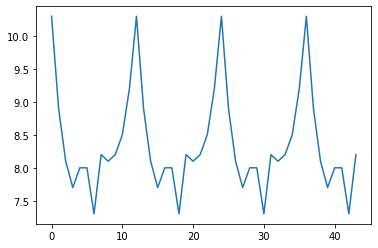

In [125]:

plt.plot(temperature_difference.isel(time =range(3,47, 1),lat = 330, lon = 265))

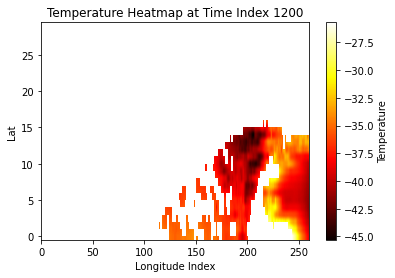

In [126]:
time_index = 1200
temperature_data = TMin.isel(time=time_index,lon = range(0,260), lat = range(330,360)).tmn

plt.imshow(temperature_data, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Heatmap at Time Index {time_index}')
plt.xlabel('Longitude Index')
plt.ylabel('Lat')
plt.show()